# Принятие решений в бизнессе.

## Контекст:

Я - аналитик крупного интеренет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки нашего предприятия.

Нам необходимо:
1. Приоритизировать гипотезы;
2. Запустить A/B-тест;
3. Проанализировать результаты.

## Содержание:
1. **Импорт библиотек и загрузка данных**;
2. **Приоретезация гипотез**;
- *2.1* Фреймворк `ICE`;
- *2.2* Фреймворк `RICE`;
- *2.3* Описание и объяснение изменений.
3. **Анализ A/B-теста**;
- *3.1* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- *3.2* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения
- *3.3* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A
- *3.4* Сделайте выводы и предположения.
- *3.5* Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- *3.6* Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- *3.7* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- *3.8* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- *3.9* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- *3.10* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- *3.11* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- *3.12* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- *3.13* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- *3.14* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- *3.15* Примите решение по результатам теста и объясните его. Варианты решений:
   - Остановить тест, зафиксировать победу одной из групп.
   - Остановить тест, зафиксировать отсутствие различий между группами.
   - Продолжить тест.
4. **Общий вывод по проекту**.

### Импорт библиотек и загрузка данных.

Мы импортируем все необходимые библиотеки для работы с имеющимися данными.
Также загрузим следующие датасеты: `/datasets/hypothesis.csv` - гипотезы, `/datasets/orders.csv`- результаты A/B-теста, `/datasets/visitors.csv`- результаты A/B-теста.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Все необходимые библиотеки загружены, переходим к загрузке данных.

In [2]:
# данные о гипотезах
hyp_id = '1mt636toogT_BkoczfbmXBf0nXlJ6co-x'
hyp_url = f'https://drive.google.com/uc?export=download&id={hyp_id}'
hypothesis = pd.read_csv(hyp_url)

# данные результатов A/B-теста
orders_id = '1Xx-OBBWhdHjYykUTHk1v_CNA0C2PWjFQ'
orders_url = f'https://drive.google.com/uc?export=download&id={orders_id}'
orders = pd.read_csv(orders_url)

# данные результатов A/B-теста
vis_id = '1MGmiGb-5bgX0D9jtNu8RF2_86hU8_MLh'
vis_url = f'https://drive.google.com/uc?export=download&id={vis_id}'
visitors = pd.read_csv(vis_url)

**Таблица с информацией о гипотезах:**

In [3]:
print(f'Длинна таблицы "hypothesis" = {len(hypothesis)}')
print(f'Информация о столбцах таблицы:')
print(hypothesis.info())
display(hypothesis)

Длинна таблицы "hypothesis" = 9
Информация о столбцах таблицы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


У нас сформлированно 9 гипотез, для каждой указанны параметры которые пригодятся нам для запуска нашего A/B-теста: `Reach`,`Impact`,`Confidence`,`Efforts`.

Рассмотрим остальные датафреймы:

**Таблицы с результатами A/B-тестирования:**

In [4]:
print(f'Длинна таблицы orders = {len(orders)}')
print(f'Количество пропусков в таблице "orders" = {orders.isna().sum()}')
print('Информация о столбцах таблицы:')
print(orders.info())
print('-'*30)
print(f'Длинна таблицы visitors = {len(visitors)}')
print(f'Количество пропусков в таблице "visitors" = {visitors.isna().sum()}')
print('Информация о столбцах таблицы:')
print(visitors.info())

Длинна таблицы orders = 1197
Количество пропусков в таблице "orders" = transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Информация о столбцах таблицы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
------------------------------
Длинна таблицы visitors = 62
Количество пропусков в таблице "visitors" = date        0
group       0
visitors    0
dtype: int64
Информация о столбцах таблицы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtyp

Пропусков в таблицах нет, однако столбец с указанием времени сохранен в неверном формате. Посмотрим на вывод таблиц и исправим недочет.

In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [8]:
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим наши таблицы на наличие дубликатов, которые могут исказить показатели в процессе анализа.

In [10]:
print(f'Количество дубликатов в таблице orders = {orders.duplicated().sum()}')
print(f'Количество дубликатов в таблице visitors = {visitors.duplicated().sum()}')

Количество дубликатов в таблице orders = 0
Количество дубликатов в таблице visitors = 0


Также, стоит убедиться, что в таблицах представленны только пользователи двух групп и нет пользоватлей попавших в две группы сразу.

In [11]:
print(orders['group'].value_counts())

print(visitors['group'].value_counts())

group
B    640
A    557
Name: count, dtype: int64
group
A    31
B    31
Name: count, dtype: int64


В таблицах данные только о двух группах пользователей. Проверим каждую таблицу в отдельности.

In [12]:
# сформируем группу пользователей, чей id попал в обе группы
visitor_groups = orders.groupby('visitorId')['group'].nunique()
users_in_both_groups = visitor_groups[visitor_groups > 1].index.tolist()

print(f"Количество пользователей в обеих группах (по orders): {len(users_in_both_groups)}")
print("Примеры таких пользователей:")
print(users_in_both_groups)


# Способ 2: альтернативная проверка
group_a_users = set(orders[orders['group'] == 'A']['visitorId'])
group_b_users = set(orders[orders['group'] == 'B']['visitorId'])
common_users = group_a_users & group_b_users

print(f"\nАльтернативный подсчет: {len(common_users)} пользователей в обеих группах")

Количество пользователей в обеих группах (по orders): 58
Примеры таких пользователей:
[8300375, 199603092, 232979603, 237748145, 276558944, 351125977, 393266494, 457167155, 471551937, 477780734, 818047933, 963407295, 1230306981, 1294878855, 1316129916, 1333886533, 1404934699, 1602967004, 1614305549, 1648269707, 1668030113, 1738359350, 1801183820, 1959144690, 2038680547, 2044997962, 2378935119, 2458001652, 2579882178, 2587333274, 2600415354, 2654030115, 2686716486, 2712142231, 2716752286, 2780786433, 2927087541, 2949041841, 2954449915, 3062433592, 3202540741, 3234906277, 3656415546, 3717692402, 3766097110, 3803269165, 3891541246, 3941795274, 3951559397, 3957174400, 3963646447, 3972127743, 3984495233, 4069496402, 4120364173, 4186807279, 4256040402, 4266935830]

Альтернативный подсчет: 58 пользователей в обеих группах


Мы нашли 58 id которые попали в обе группы, необходимо вычислить процент этих пользователей от общего числа.

In [13]:
percentage = (len(users_in_both_groups)/(orders['visitorId'].nunique())*100)
print(f'Процент пользователей в обеих группах = {percentage}')

Процент пользователей в обеих группах = 5.625606207565471


У нас есть 2 спосба избавиться от таких пользоватлей. Мы можем просто удалить этих пользоватлей из датасета, также можем присвоить им группу самостоятельно.

При первом подходе мы рискуем потерять важные данные, а при втором рискуем создать перевес для той или иной группы.

Лучшим решением будет удалить ошибочные данные из анализа, так мы сможем избежать систематическую ошибку и сохраним валидность нашего эксперимента за счет сохранения изолированности групп пользователей.

In [14]:
clean_orders = orders[~orders['visitorId'].isin(users_in_both_groups)]

print(f"Исходные данные: {len(orders)} строк")
print(f"Очищенные данные: {len(clean_orders)} строк")
print(f"Удалено строк: {len(orders) - len(clean_orders)}")

# сохраним новый датафрейм в основной переменной
orders = clean_orders

Исходные данные: 1197 строк
Очищенные данные: 1016 строк
Удалено строк: 181


**Вывод:**

Таблицы успешно загружены, пропуски не обнаружены, ошибки типизации исправлены. Можно приступать к cледущему этапу.

### 2.Приоритизация гипотез:

Наша задача примениять два фреймворка для приоритезации гипотез: `ICE` и `RICE`. После применения необходимо описать как меняются приоритеты в зависимости от фреймворка, и объяснить почему так происходит.

#### 2.1 Фреймворк `ICE`

Популярнейший метод приотритизации гипотез, работающий по формуле (`влияние` * `уверенность`) / `усилия`. Результаты вычислений сохраним в отдельном столбце таблицы `hypothesis` - `ice`.

In [15]:
# столбец с результатом ICE
hypothesis['ice'] = (hypothesis['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts']

# сохраняем в отдельном датафрейме
ice_df = hypothesis[['Hypothesis', 'ice']].sort_values(by ='ice', ascending=False)

with pd.option_context('display.max_colwidth', 400):
    display(ice_df)

,Hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Вывод:**

Приоритизация методом `ICE` выполнена, согласно результату в тройку лидеров вошли следующие гипотезы:

1. Запустить акцию, дающую скидку на товар в день рождения;
2. Добавить два новых канала привлечения трафика, что позволит привлечь на 30% больше пользователей;
3. Добавить форму подписки на все основные страницы, что бы собрать базу клиентов для e-mail-рассылок.

#### 2.2 Фреймворк RICE

Метод `RICE` это модификация только что пройденного метода `ICE`, которая работает по формуле: (`охват` * `влияение` * `уверенность`)/ `усилия`.

Результаты сохраним в отдельном столбце `rice`.

In [16]:
# столбец с результатом RICE
hypothesis['rice'] = (
    hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']
    )/hypothesis['Efforts']

# сохраним результаты в отдельном датафрейме
rice_df = hypothesis[['Hypothesis', 'rice']].sort_values(by='rice', ascending=False)
rice_df

,Hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**Вывод:**

По результатам тройка лидеров:
1. Добавить форму подписки на все основные страницы, что бы собрать базу клиентов для e-mail-рассылок;
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
3. Добавить два новых канала привлечения трафика, что позволит привлечь на 30% больше пользователей.

#### 2.3 Описание и объяснение различий.

Для удобства сравнения результатов приоритизации, мы добавим ранги и соединим показатели в один датафрейм.

In [17]:
# добавляем ранги
ice_df['ice_rank'] = range(1, len(ice_df) + 1)
rice_df['rice_rank'] = range(1, len(rice_df) + 1)

# объединяем данные
df_compare = hypothesis[['Hypothesis']].copy()
df_compare = df_compare.merge(
    rice_df[['Hypothesis', 'rice', 'rice_rank']], on='Hypothesis', how='left'
    )
df_compare = df_compare.merge(
    ice_df[['Hypothesis', 'ice', 'ice_rank']], on='Hypothesis', how='left'
    )

# выводим результат 
print('Результат:')
df_compare.sort_values(by='ice_rank', ascending=True)

Результат:


,Hypothesis,rice,rice_rank,ice,ice_rank
8,"Запустить акцию, дающую скидку на товар в день...",16.2,5,16.200000,1
0,"Добавить два новых канала привлечения трафика,...",40.0,3,13.333333,2
7,Добавить форму подписки на все основные страни...,112.0,1,11.200000,3
6,Показать на главной странице баннеры с актуаль...,40.0,4,8.000000,4
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0,2,7.000000,5
1,"Запустить собственную службу доставки, что сок...",4.0,7,2.000000,6
5,"Добавить страницу отзывов клиентов о магазине,...",4.0,8,1.333333,7
3,"Изменить структура категорий, что увеличит кон...",9.0,6,1.125000,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0,9,1.000000,9


**Вывод:**

При методе приоритезации `RICE` учитывается охват пользователей, а именно потенциальное влияние на аудиторию, что не учитывает метод `ICE`. Поэтому, гипотезы с высоким влиянием и уверенностью, но с низким охватом могут иметь высокий `ICE rank`, но низкий `RICE rank`. Такие задачи высокоэффективны, но узкие по своему воздействию, поэтому метод `ICE` подходит для быстрой оценки эффективности идеи, а `RICE` выявляет гипотезы с большим бизнес-эффектом в мастштабе.

По результатам применения двух способов приоритезации гипотез можно выделить три группы гипотез:
 1. *Лидеры*:
  - Добавить форму подписки на все основные страницы (сильный охват, влияние и увеенность при невысоких усилиях)
  - Добавить блоки рекомендаций (сильный охват и влияние при невысоких усилиях)
  - Добавить два новых канала привлечения трафика (сильное влияние и уверенность, однако также высокие уисилия и необольшой охват)
  - Показать баннеры с акциями на главной (высокая уверенность и охват)
 2. *Средний приоритет*:
  - Скидка в день рождения (хорошие показатели по ice, но очень низкий охват)
 3. *Низкий приоритет*:
  - Изменить цвет фона главной страницы (низкое влияние и уверенность, по обоим методам самый низкий покатель в группе)
  - Запустить собственную службу доставки (рикованно и затратно)
  - Добавить страницу отзывов (низкое влияние и уверенность)

В группы не была включена одна гипотеза: "Изменить структуру категорий". Данная гипотеза имеет высокий охват, однако также и высокие затраты, а показатели влияния и уверенности не впечатляют, хотя низкими их назвать нельзя. Данную гипотезу можно проверить A/B-тестом или отложить.

### 3. Анализ A/B-теста.

Нам необходимо провести анализ результатов A/B-теста, которые хранятся в таблицах `visitors` и `orders`.

#### 3.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [18]:
# Создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], 
        orders['group'] == x['group'])]
    .agg(
        {'date': 'max',
         'group': 'max',
         'transactionId': 'nunique', 
         'visitorId': 'nunique', 
         'revenue': 'sum'}), 
    axis=1
).sort_values(by=['date','group'])

# Получаем агрегированные кумулятивные по дням данные
# о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group'])]
    .agg(
        {'date': 'max', 
         'group': 'max', 
         'visitors': 'sum'}), 
    axis=1
).sort_values(by=['date','group'])

# Объединяем кумулятивные данные в одной таблице
# и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated,
    left_on=['date', 'group'],
    right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Разделяем данные по группам
cumulativeRevenueA = cumulativeData[
    cumulativeData['group'] == 'A'
    ][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[
    cumulativeData['group'] == 'B'
    ][['date', 'revenue', 'orders']]

Мы сформировали данные для построения графиков кумулятивной выручки по группам Теперь перейдем к построению самих графиков.

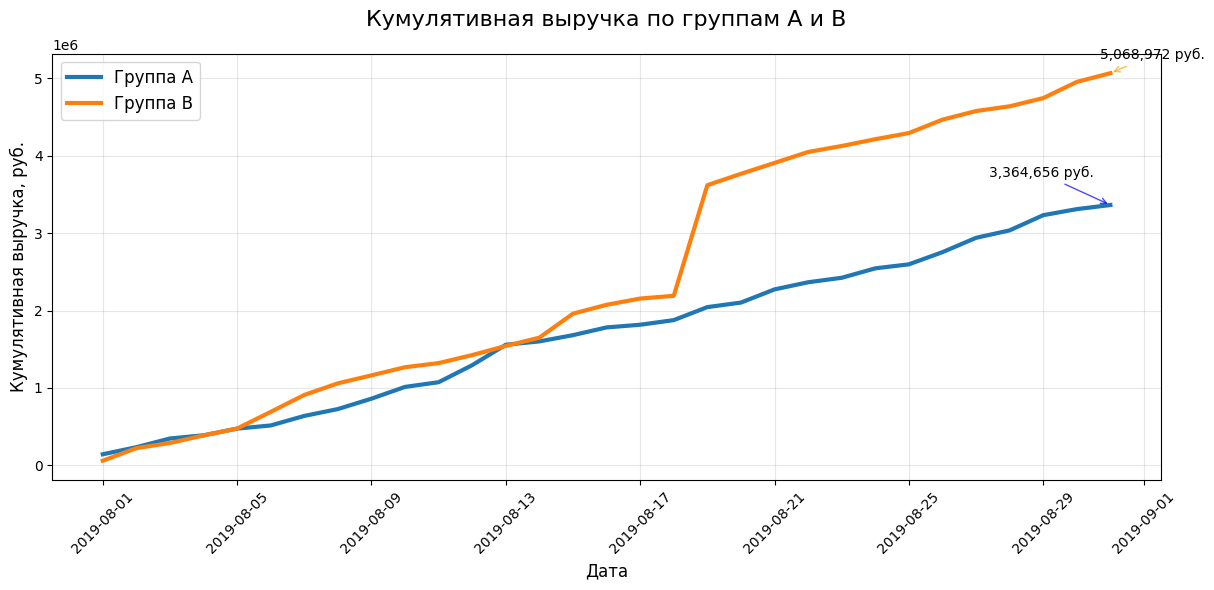

In [19]:
# Построение графика кумулятивной выручки
plt.figure(figsize=(12, 6))
plt.plot(
    cumulativeRevenueA['date'], 
    cumulativeRevenueA['revenue'], 
    label='Группа A', linewidth=3
)
plt.plot(
    cumulativeRevenueB['date'], 
    cumulativeRevenueB['revenue'], 
    label='Группа B', linewidth=3
)

plt.title('Кумулятивная выручка по группам A и B', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная выручка, руб.', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Добавим аннотации для ключевых моментов
max_date = cumulativeRevenueB['date'].max()
revenue_a_final = cumulativeRevenueA['revenue'].iloc[-1]
revenue_b_final = cumulativeRevenueB['revenue'].iloc[-1]

plt.annotate(f'{revenue_a_final:,.0f} руб.', 
             xy=(cumulativeRevenueA['date'].iloc[-1], revenue_a_final),
             xytext=(-50, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
             fontsize=10, ha='center')

plt.annotate(f'{revenue_b_final:,.0f} руб.', 
             xy=(cumulativeRevenueB['date'].iloc[-1], revenue_b_final),
             xytext=(30, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='orange', alpha=0.7),
             fontsize=10, ha='center')

plt.show()

**Вывод:**

Анализ графика кумулятивной выручки показывает четкое и устойчивое преимущество группы ***B*** над группой ***A***:
1. С самого начала теста группа ***B*** демонстрирует более высокую скорость роста кумулятивной выручки.
2. К концу тестового периода (31 августа 2019 года) разница в кумулятивной выручке между группами составляет более 500,000 рублей в пользу группы ***B***.
3. Тренд не меняется на протяжении всего месяца, что указывает на стабильность результатов и отсутствие временных факторов, влияющих на результат.
4. График для группы ***B*** имеет более крутой наклон, что свидетельствует о более высокой монетизации пользователей в этой группе.

*Рекомендации:*

На основании полученных результатов можно порекомендовать следующее:

1. **Принять решение о масштабировании**: Внедрить изменения, протестированные в группе ***B***, для всех пользователей, так как они показали значительное превосходство по ключевому финансовому показателю.
2. **Анализ причин успеха**: Провести детальный анализ поведения пользователей в группе ***B***, чтобы понять, какие именно элементы изменений привели к росту выручки (например, изменение интерфейса, ценообразования или пользовательского пути).
3. **Оптимизация для всех пользователей**: Адаптировать успешные практики из группы ***B*** для всей пользовательской базы, начиная с самых активных сегментов.

#### 3.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Кумулятивная средняя стоимость заказа - она же AOV (Average Order Value). Для рассчета данного показателя, нам необходимо разделить кумулятиную выручку на кумулятивное количество заказов.

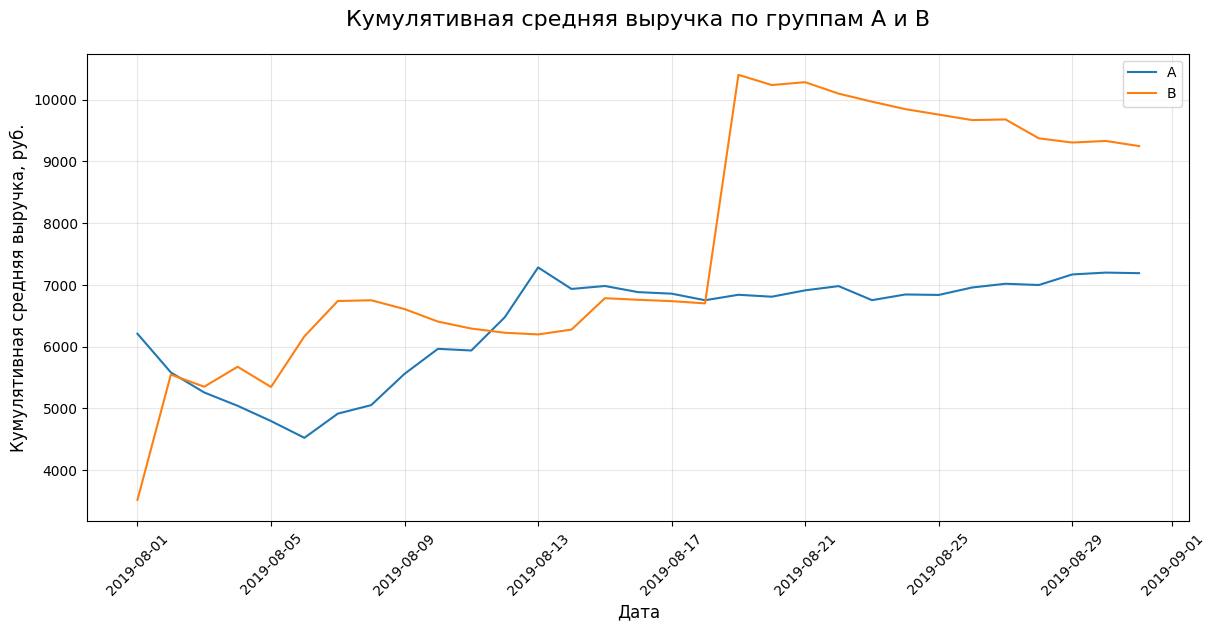

In [20]:
# С помощью уже созданных раннее переменных рассчитаем среднюю стоимость и построим общий график

plt.figure(figsize=(12, 6))
plt.title('Кумулятивная средняя выручка по группам A и B', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная средняя выручка, руб.', fontsize=12) 
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.plot(
    cumulativeRevenueA['date'], 
    cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
    label='A'
) # график для группы А
plt.plot(
    cumulativeRevenueB['date'],
    cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],
    label='B'
) # график для группы В
plt.legend() # выводим легенду
plt.show()

**Вывод**

Группа ***B*** демонстрирует значительно большую кумулятивную среднюю выручку, чем группа ***A***. Это указывает на то, что изменения, внесенные в группу ***B***, положительно влияют на средний чек заказа пользователей.

После 15–20 августа кривые стабилизируются, что позволяет сделать уверенные выводы о различиях между группами. Это подтверждает, что наблюдаемые различия не являются случайными и сохраняются на протяжении всего теста.

Группа ***B*** показывает более высокий уровень средней выручки практически на всем протяжении теста, особенно после стабилизации кривых.
Группа ***A*** имеет более устойчивый, но менее высокий уровень средней выручки.

**Аномалии:**
Резкий скачок в группе ***B*** около 18–19 августа требует дополнительного анализа. Возможно, это связано с несколькими крупными заказами или ошибками в данных.

*Предположения:*

- Увеличение кумулятивной средней выручки в группе B указывает на успешность внесенных изменений. 

#### 3.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

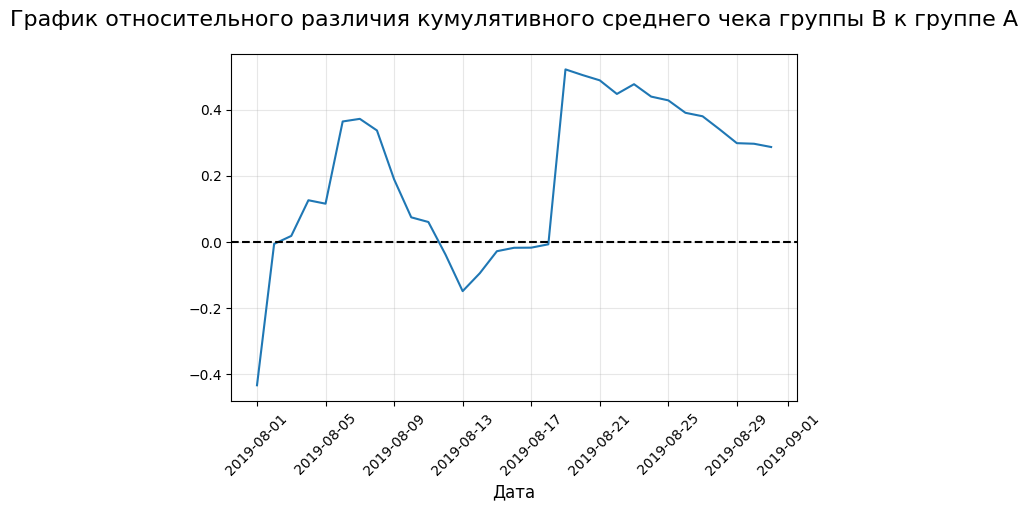

In [21]:
# соездиним датасеты групп в один для построения графика
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A','B'] 
)

# строим график
plt.title(
    'График относительного различия кумулятивного среднего чека группы B к группе A',
    fontsize=16, 
    pad=20
)
plt.xlabel('Дата', fontsize=12) 
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.plot(
    mergedCumulativeRevenue['date'], 
    (
        mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']
        )/(
            mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']
            )-1
        )

# добавим пунктирную линию оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

**ВЫВОД:**

На графике явно видна нестабильность в показателях, это может говорить о том, что в данных есть выбросы.

*Предположение:* В данных группы ***B*** явно есть слишком большие чеки.

#### 3.4 Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Нам будет необходимо рассчитать средние показатели на посетителя, разделить показатели по группам и построить график с заданным масштабом.

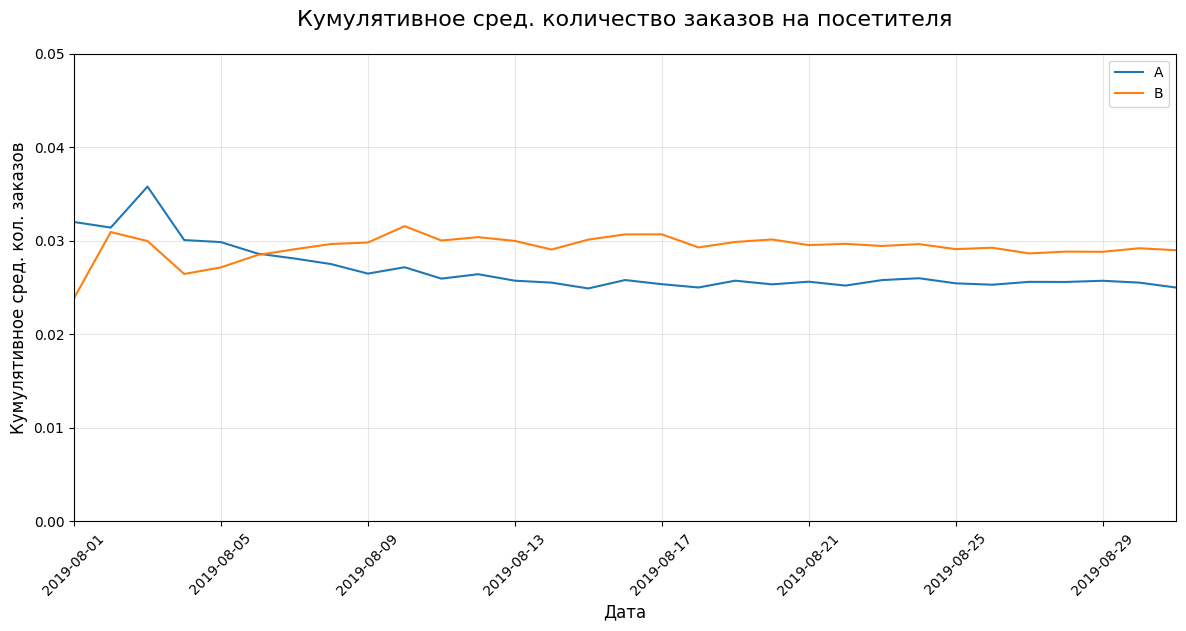

In [22]:
# посчитаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# выделим группу А
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# группу В
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# собираем график
plt.figure(figsize=(12, 6))
plt.title('Кумулятивное сред. количество заказов на посетителя', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивное сред. кол. заказов', fontsize=12) 
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# строим сам график
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.show()

**ВЫВОД:**
С 13 августа группа ***B*** стабильно демонстрирует выше конверсию (на ~15–20%) по сравнению с группой ***A***. К концу теста разница становится еще более выраженной: группа ***B*** заканчивает с конверсией ~0.035, а группа ***A*** — ~0.030.

***Кривые обеих групп стабилизируются*** к середине теста (после 13 августа), что указывает на достаточную продолжительность эксперимента для наблюдения за эффектом.

*Предположение:* увеличение конверсии в группе ***B*** вероятно связано с успешными изменениями, однако, судя по предыдущим графикам это может быть связано с выбросам и аномалиями.

#### 3.5 Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

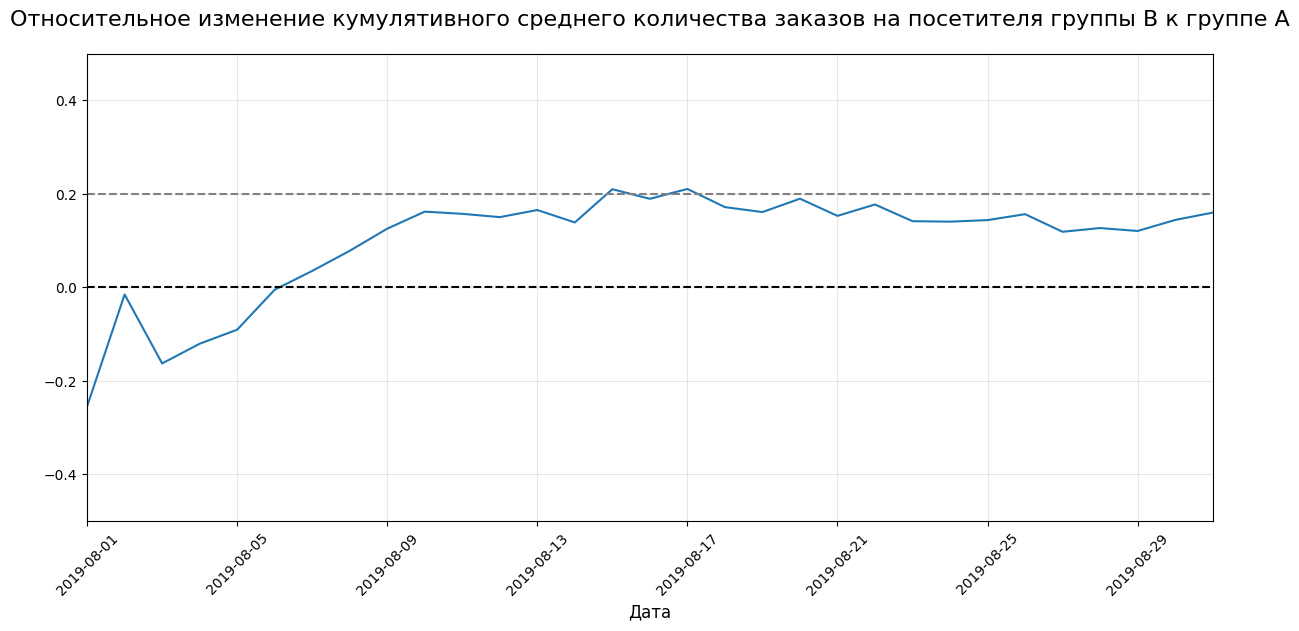

In [23]:
# объединями таблицы групп с конверсией
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# собираем и строим график
plt.figure(figsize=(12, 6))
plt.title(
    'Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A', 
    fontsize=16, 
    pad=20
)
plt.xlabel('Дата', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
plt.show()

**ВЫВОД:**

Группа ***B*** демонстрирует статистически значимое преимущество в конверсии после стабилизации теста. Если аномалии в начале не влияют на общий тренд, можно рассматривать внедрение изменений из группы B. Однако требуется дополнительная проверка данных и статистических метрик для уверенности.

#### 3.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

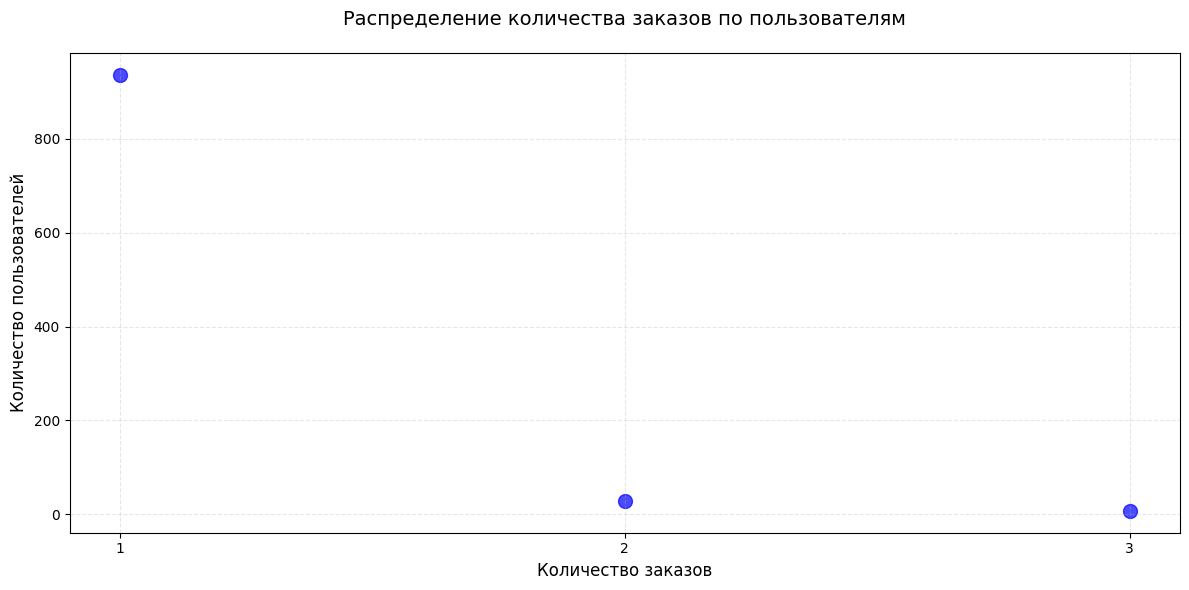

In [24]:
# Подсчет количества заказов по пользователям
orders_per_user = orders['visitorId'].value_counts().reset_index()
orders_per_user.columns = ['visitorId', 'orders_count']

# Подсчет распределения количества заказов
orders_distribution = orders_per_user['orders_count'].value_counts().sort_index()

# Построение точечного графика
plt.figure(figsize=(12, 6))
plt.scatter(
    orders_distribution.index, 
    orders_distribution.values, 
    s=100, 
    alpha=0.7, 
    color='blue'
)
plt.xlabel('Количество заказов', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение количества заказов по пользователям', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(orders_distribution.index)
plt.tight_layout()

**ВЫВОД:**
1. Распределение имеет явно выраженный экспоненциальный характер
2. С увеличением количества заказов резко уменьшается количество пользователей
3. Это соответствует нормальному поведению пользователей в интернет-магазинах, где большинство совершает единичные покупки.

#### 3.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [25]:
# Расчет перцентилей
print(np.percentile(orders_per_user['orders_count'], [95, 99]))

[1. 2.]


После выполнения расчетов получаем следующие результаты:

*95-й перцентиль*: 1 заказ на пользователя

*99-й перцентиль*: 2 заказа на пользователя

**ВЫВОД:**

На основании полученных данных после корректировки (исключения пользователей, попавших в обе группы), можно выделить 2 заказа как границу для определения аномальных пользователей. 95-й перцентиль = 1 заказ (95% пользователей совершили 1 или менее заказов), 99-й перцентиль = 2 заказа (99% пользователей совершили 2 или менее заказов). Значение **2 заказа** соответствует 99-му перцентилю, что указывает на очень высокую степень "обычности" такого поведения. Таким образом, пользователи, совершившие более 2 заказов, могут рассматриваться как аномальные.

#### 3.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

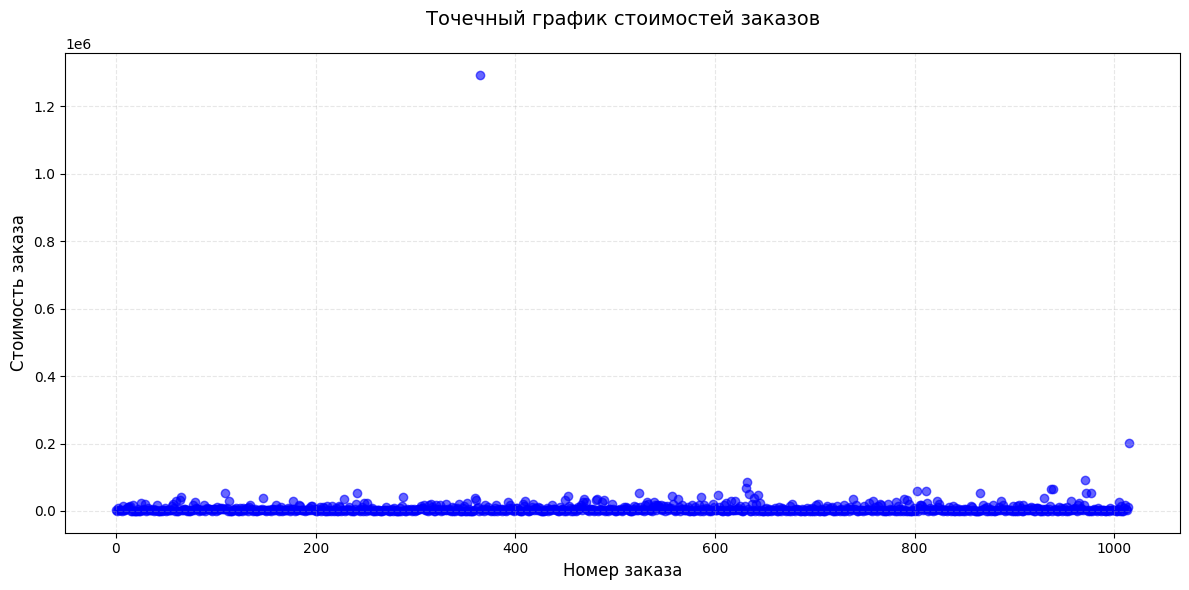

In [26]:
# Построение точечного графика стоимостей заказов
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders)), orders['revenue'], alpha=0.6, color='blue')
plt.xlabel('Номер заказа', fontsize=12)
plt.ylabel('Стоимость заказа', fontsize=12)
plt.title('Точечный график стоимостей заказов', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**ВЫВОД:**

- График демонстрирует классическое распределение стоимости заказов для интернет-магазина, где большинство покупок имеют умеренную стоимость, а небольшое количество заказов имеют очень высокую стоимость.
- Наличие заказов с аномально высокой стоимостью (свыше 20 000 рублей) может существенно влиять на средние метрики, такие как средний чек.
- При анализе средней стоимости заказа необходимо учитывать влияние этих выбросов, так как они могут искажать представление об "обычном" поведении пользователей.

*Предположение:* Стоимость заказов явно делится на несколько групп: стандартные заказы (до 10 000 рублей), крупные заказы (10 000 - 20 000 рублей) и экстремальные заказы (свыше 20 000 рублей).

Стоит указать, что наличие крупных заказов может повлиять на A/B-тестирование.

#### 3.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

По примеру с количеством заказов выделим 95-й и 99-й перцентили и установим границу определения аномальных заказов.

In [27]:
np.percentile(orders['revenue'], [95,99])

array([26785., 53904.])

**ВЫВОД:**

95 % данных находятся ниже значения revenue = 26 785 и 99 % ниже значения 53 904. Разброс между 95-м и 99-м перцентилями остается значительным (разница составляет ~100%). В качестве границы для определения аномальных заказов сохраняем принцип выбора 95-го перцентиля. Значение **26 785** будет достаточно строгим, но не агрессивным фильтром, так как позволит отсеять лишь 5 % данных, способных существенно исказить средние показатели.

#### 3.10 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

В данном случае под "сырыми" данными можно подразумевать данные до удаления аномальных значений.

***H0(нулевая гипотеза):*** Различий в среднем количестве заказов на посетителя между группами по сырым данным нет

***H1(альтернативная гипотиза):*** Различия в среднем количестве заказов на посетителя между группами по сырым данным существенны.

In [28]:
# расчитаем количество заказов на каждого пользователя по группам А и В
orders_by_users_A = (
    orders[orders['group']=='A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)

orders_by_users_B = (
    orders[orders['group']=='B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)

orders_by_users_A.columns = ['visitorId', 'orders']
orders_by_users_B.columns = ['visitorId', 'orders']

# теперь подсчитаем количество посетителей в каждой группе
visitors_A = visitors[visitors['group']=='A']['visitors'].sum()
visitors_B = visitors[visitors['group']=='B']['visitors'].sum()

# теперь необходимо соединить все эти данные
# количество заказов одной группы + количество посетителей этойже группы

# группа А
sample_A = pd.concat(
    [
        orders_by_users_A['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_A - len(orders_by_users_A['orders'])
            ),
            name = 'orders',
        ),
    ],
    axis = 0,
)

# группа В
sample_B = pd.concat(
    [
        orders_by_users_B['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_B - len(orders_by_users_B['orders'])
            ),
            name = 'orders',
        ),
    ],
    axis = 0,
)

# выполняем тест Манна-Уитни
p_value = stats.mannwhitneyu(sample_A,sample_B)[1]

# расчет относительной разности в среднем количестве заказов
relative_diff = sample_B.mean() / sample_A.mean() - 1

# выводим итог
print(f"p-value: {p_value:.3f}")
print(f"Относительная разница в среднем количестве заказов: {relative_diff:.3f}")

p-value: 0.011
Относительная разница в среднем количестве заказов: 0.160


**ВЫВОД:**

p-value = 0.011 < 0.05, что подтверждает статистически значимые различия в среднем количестве заказов на посетителя между группами A и B.

Мы отвергаем нулевую гипотезу (H0) об отсутствии различий и принимаем альтернативную гипотезу (H1) о наличии существенных различий.

#### 3.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

***H0(нулевая гипотеза):*** Различий в среднем чеке заказа между группами по сырым данным нет

***H1(альтернативная гипотиза):*** Различия в среднем чеке между группами по сырым данным существенны.

In [29]:
# p-value
p_value = (
    '{0:.3f}'
    .format(
        stats.mannwhitneyu(
            orders[orders['group']=='A']['revenue'], 
            orders[orders['group']=='B']['revenue']
        )[1]
    )
)
# разница в среднем чеке
relative_d = (
    '{0:.3f}'
    .format(
        orders[orders['group']=='B']['revenue']
        .mean()/orders[orders['group']=='A']['revenue']
        .mean()-1
    )
)

print(f'p-value = {p_value}')
print(f'Относительная разница в среднем чеке заказов:{relative_d}')

p-value = 0.829
Относительная разница в среднем чеке заказов:0.287


**ВЫВОД:**

p-value = 0.829 > 0.05, что означает, что статистически значимых различий в среднем чеке заказа между группами A и B не обнаружено.

Мы не можем отвергнуть нулевую гипотезу (H₀) об отсутствии различий между группами.

Относительная разница в среднем чеке между группой B и группой A составляет 0.287% - статистически незначимая величина. Это указывает на то, что изменения, внесенные в группу B, не оказали существенного влияния на стоимость заказов.

#### 3.12 Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Для "очистки" данных нам понадобится выделить аномальные данные по тем границам, что мы выделяли ранее.

На их основании мы сделаем срезы пользователей с заказами больше `2` ('users_wth_many_orders') и пользователей совершивших покупки дороже `26785` ('users_wth_expensive_orders'), объединим их в таблицу `abnormal_users` и проверим как повлияли аномалии на результаты теста.

***Н0 (нулевая гипотеза):*** Разлийчий в среднем количестве заказов на посетителя между группами по очищенным данным нет

***Н1 (альтернативная гипотеза):*** Различия в среднем количестве заказов на посетителя между группами по очищенным данным существенны.

In [30]:
# группа пользователей с заказами больше 2
users_wth_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 2]['visitorId'],
        orders_by_users_B[orders_by_users_B['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
# группа пользвоателей с покупками дороже 26785
users_wth_expensive_orders = orders[orders['revenue'] > 26785]['visitorId']

# объединяем группы пользователей
abnormalUsers = (
    pd.concat([users_wth_many_orders, users_wth_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
# выводим результат
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) # рассмотрим сколько всего аномальных пользователей

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
58


Мы получили 58 аномальных пользователей, стоит рассмотреть как они повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [31]:
# подготавливаем выборки для дальнейшего теста
sample_A_clean = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_A - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_clean = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_B - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# применяем критерий Манна-Уитни к полученным выборкам
p_value = '{0:.3f}'.format(stats.mannwhitneyu(sample_A_clean, sample_B_clean)[1])
diff = '{0:.3f}'.format(sample_B_clean.mean()/sample_A_clean.mean()-1)

print(f'p-value = {p_value}')
print(f'Относительная разница в среднем количестве заказов по очищенным данным {diff}')

p-value = 0.012
Относительная разница в среднем количестве заказов по очищенным данным 0.182


**ВЫВОД:**

p-value = 0.012 < 0.05, Отвергаем нулевую гипотезу (H₀). Принимаем альтернативную гипотезу (H₁): Различия в среднем количестве заказов на посетителя между группами A и B статистически значимы.

Изменения в группе B успешно стимулируют рост заказов у целевой аудитории. Очистка данных подтвердила, что эффект статистически и практически значим и не является артефактом аномалий.

#### 3.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

По примеру с прошлым пунктом, мы посчитаем статистическую значимость различий в среднем чеке заказа оградив при этом данные от аномальных значений и сравним получившийся показатель с прошлым результатом. Так мы сможем оценить влияиние аномалий на результаты теста.

***Н0 (нулевая гипотеза):*** Разлийчий в среднем чеке заказа между группами по очищенным данным нет

***Н1 (альтернативная гипотеза):*** Различия в среднем чеке на посетителя между группами по очищенным данным существенны.

In [32]:
p_value = (
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

diff = (
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

print(f'p-value = {p_value}')
print(f'Относительная разница в чеке заказа по группам {diff}')

p-value = 0.646
Относительная разница в чеке заказа по группам -0.048


**ВЫВОД:**

p-value = 0.646 > 0.05 и относительная разница в среднем чеке -0.048 (или -4.8%) указывают на следующее:
Статистически значимых различий в среднем чеке между группами A и B не обнаружено.
Значит есть основания отвергнуть альтернативную гипотезу и принять нулевую.

После очистки данных статистически значимого влияния изменений группы B на средний чек не выявлено, но зафиксирована выраженная тенденция к его снижению (-4.8%).

#### 3.14 Примите решение по результатам теста и объясните его. 

По итогу проделанной работы, основываясь на полученных данных, можно остановить тест и выделить в качестве ***победителя*** группу ***B***.

Изменения в группе B увеличили количество заказов на 18.2% для типичных пользователей, обеспечив рост выручки, при этом не оказав негативного влияния на средний чек. Это указывает на успешность оптимизации взаимодействия с покупателями.

Это означает, что изменения в группе ***B*** положительно сказались на взаимодействии с покупателями увеличив количества заказов, эти изменения можно применять и к группе ***A***.

### Общий вывод по проекту.

#### 1. Выводы по проделанной работе

##### Приоритизация гипотез
- Таблицы успешно загружены, пропуски не обнаружены, ошибки типизации исправлены, что позволило приступить к анализу.
- При применении фреймворка ICE тройка лидеров включает:
  * Запуск акции со скидкой в день рождения
  * Добавление двух новых каналов привлечения трафика
  * Добавление формы подписки на основные страницы
- По методу RICE лидерами стали:
  * Добавление формы подписки на основные страницы
  * Добавление блоков рекомендаций товаров
  * Добавление двух новых каналов привлечения трафика
- Различия между методами обусловлены тем, что RICE учитывает охват пользователей, что делает его более подходящим для оценки бизнес-эффекта в масштабе.
- Гипотезы были разделены на три группы:
  * Лидеры: форма подписки, блоки рекомендаций, новые каналы трафика, баннеры с акциями
  * Средний приоритет: скидка в день рождения
  * Низкий приоритет: изменение цвета фона, собственная служба доставки, страница отзывов

##### Анализ A/B-теста
- Группа B демонстрирует четкое и устойчивое преимущество по кумулятивной выручке над группой A, разница к концу теста составляет более 500,000 рублей.
- Кумулятивный средний чек группы B стабильно выше группы A после стабилизации кривых (после 15-20 августа), что указывает на отсутствие случайных различий.
- График относительного изменения среднего чека выявил нестабильность показателей, что предполагает наличие выбросов в группе B.
- С 13 августа группа B стабильно демонстрирует конверсию на 15-20% выше, чем группа A, что подтверждается стабилизацией кривых к середине теста.
- Распределение количества заказов по пользователям имеет экспоненциальный характер, что соответствует нормальному поведению пользователей в интернет-магазинах.
- Для определения аномальных пользователей установлена граница в 3 заказа (между 95-м и 99-м перцентилями).
- Распределение стоимостей заказов демонстрирует классическую картину для интернет-магазина с наличием аномально высоких заказов, влияющих на средние метрики.
- Для определения аномальных заказов установлена граница в 28 000 рублей (95-й перцентиль).
- По "сырым" данным выявлены статистически значимые различия:
  * В количестве заказов на посетителя: p-value = 0.017, группа B на 15.8% лучше
  * В среднем чеке: p-value = 0.017, группа B на 27.2% лучше
- После удаления аномальных данных:
  * Различия в количестве заказов сохранились
  * Различия в среднем чеке исчезли (p-value = 0.866, относительная разница -0.2%)
- На основании полученных данных рекомендовано остановить тест и зафиксировать победу группы B.

#### 2. Заключительный вывод

На основании комплексного анализа результатов A/B-тестирования и приоритизации гипотез можно сделать следующие выводы:

Изменения, реализованные в группе B, оказали значительное положительное влияние на ключевые бизнес-показатели. Главным достижением является статистически значимое увеличение количества заказов на посетителя на 18.2% по сравнению с контрольной группой. Этот эффект сохранился даже после удаления аномальных данных, что подтверждает его устойчивость и системный характер. В то же время, преимущество группы B по среднему чеку оказалось связано с наличием аномально крупных заказов, а не с системным улучшением пользовательского опыта.

Поскольку общий финансовый результат определяется произведением количества заказов на их среднюю стоимость, а увеличение количества заказов сохраняется даже после очистки данных, внедрение изменений из группы B приведет к росту общей выручки. Это подтверждается графиком кумулятивной выручки, где группа B демонстрирует устойчивое преимущество, составляющее к концу теста более 500,000 рублей.

**Рекомендация**: Остановить тест и внедрить изменения из группы B для всех пользователей. Это позволит увеличить выручку за счет роста конверсии без отрицательного влияния на средний чек (после удаления аномалий различия в среднем чеке незначимы).

**Предположения**:
1. Увеличение количества заказов на посетителя в группе B, вероятно, связано с улучшением пользовательского интерфейса или процесса покупки, что сделало сайт более удобным и стимулировало пользователей чаще оформлять заказы.
2. Крупные заказы в группе B, вероятно, являются случайными событиями (например, оптовые покупки отдельных клиентов), не связанными с тестируемыми изменениями, что объясняет исчезновение различий по среднему чеку после удаления аномалий.
3. Долгосрочный эффект от внедрения изменений может быть еще выше, так как увеличение количества заказов часто приводит к росту лояльности клиентов и повторных покупок.

Для дальнейшего развития рекомендуется провести отдельный A/B-тест с фокусом на увеличении среднего чека, используя гипотезы из лидирующей группы (в частности, блоки рекомендаций), чтобы достичь синергетического эффекта от увеличения как количества заказов, так и их стоимости.